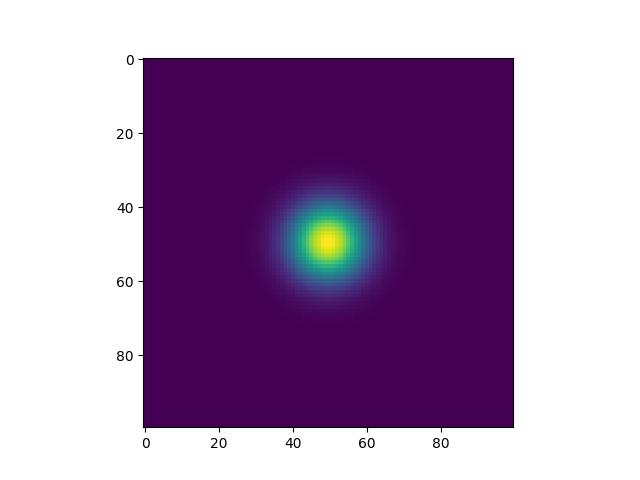

In [23]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

x = np.matrix(np.linspace(-5,5,100))
y = np.transpose(x)

f = np.exp(-np.square(x)-np.square(y))


plt.imshow(f)
plt.show()


In [19]:
np.square(x)

matrix([[25.        , 15.12345679,  7.71604938,  2.77777778,  0.30864198,
          0.30864198,  2.77777778,  7.71604938, 15.12345679, 25.        ]])